In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


ModuleNotFoundError: No module named 'google.colab'

In [3]:
import pandas as pd
import numpy as np
import os

In [ ]:
depth20_folder = '/content/drive/MyDrive/Colab Notebooks/depth20_1000ms'
aggtrade_folder = '/content/drive/MyDrive/Colab Notebooks/aggTrade'


In [5]:
# Function to merge all .txt files from a folder
def merge_txt_files(folder_path):
    all_dfs = []
    for file in os.listdir(folder_path):
        if file.endswith('.txt'):
            file_path = os.path.join(folder_path, file)
            df = pd.read_csv(file_path)
            all_dfs.append(df)
    return pd.concat(all_dfs, ignore_index=True)

In [7]:
# Merge files
depth20_df = merge_txt_files(depth20_folder)
aggtrade_df = merge_txt_files(aggtrade_folder)

NameError: name 'depth20_folder' is not defined

In [9]:

# Robust time parser
def parse_time(val):
    if pd.isna(val):
        return np.nan
    val = str(val).replace('+0530 IST', '').strip()

In [13]:
 # 1. Float minutes format
    try:
        return float(val) * 60
    except ValueError:
        pass

    # 2. DateTime format
    try:
        from datetime import datetime
        dt = datetime.strptime(val, '%Y-%m-%d %H:%M:%S')
        return (dt - dt.replace(hour=0, minute=0, second=0, microsecond=0)).total_seconds()
    except ValueError:
        pass

    # 3. Colon-separated formats
    parts = val.split(':')
    if len(parts) == 2:
        try:
            return int(parts[0]) * 60 + float(parts[1])
        except ValueError:
            return np.nan
    elif len(parts) == 3:
        try:
            return int(parts[0]) * 3600 + int(parts[1]) * 60 + float(parts[2])
        except ValueError:
            return np.nan

    return np.nan
   

IndentationError: unexpected indent (2805841902.py, line 2)

In [15]:
# Save merged DataFrames to Google Drive
depth20_output = '/content/drive/MyDrive/Colab Notebooks/depth20_1000ms.csv'
aggtrade_output = '/content/drive/MyDrive/Colab Notebooks/aggTrade.csv'

depth20_df.to_csv(depth20_output, index=False)
aggtrade_df.to_csv(aggtrade_output, index=False)

print("Files merged and saved as 'depth20.csv' and 'aggTrade.csv' in your Drive.")


NameError: name 'depth20_df' is not defined

In [17]:

if not aggtrade_df.empty:
    aggtrade_df['Seconds'] = aggtrade_df['Time'].apply(parse_time)
    # Drop rows where time parsing failed (resulting in NaN in 'Seconds')
    aggtrade_df.dropna(subset=['Seconds'], inplace=True)
    aggtrade_df['Second'] = aggtrade_df['Seconds'].astype(int)
    # For example, take the last price/trade in each second
    agg_trade_1s = aggtrade_df.groupby('Second').last().reset_index()
    print("agg_trade_1s created successfully")
    display(agg_trade_1s.head())
else:
    print("aggtrade_df is empty, skipping time parsing and aggregation.")

NameError: name 'aggtrade_df' is not defined

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
depth20_1000ms = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/depth20_1000ms.csv')
agg_trade = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/aggTrade.csv')

# Define the time cleaning function
def clean_time_column(col):
    col = col.astype(str)  # ensure all values are strings
    col = col.str.replace(r'\s\+0530\sIST', '', regex=True)  # remove timezone
    col = col.str.slice(0, 26)  # truncate to microsecond precision
    return pd.to_datetime(col, errors='coerce')  # convert to datetime

# Clean and convert time columns
depth20_1000ms['Time'] = clean_time_column(depth20_1000ms['Time'])
agg_trade['Time'] = clean_time_column(agg_trade['Time'])  # Fixed typo: 'agg_trade_1s' was undefined

# Sanity check
print(depth20_1000ms['Time'].head())
print(agg_trade['Time'].head())


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/depth20_1000ms.csv'

In [21]:
def clean_time_column(col):
    # Force everything to string first
    col = col.astype(str)

    # Remove '+0530 IST' and trim excess nanosecond-level precision
    col = col.str.replace(r'\s\+0530\sIST', '', regex=True)
    col = col.str.slice(0, 26)  # Keep up to microseconds
    return col

# Clean and parse time columns
depth20_1000ms['Time'] = clean_time_column(depth20_1000ms['Time'])
agg_trade_1s['Time'] = clean_time_column(agg_trade_1s['Time'])

depth20_1000ms['Time'] = pd.to_datetime(depth20_1000ms['Time'], errors='coerce')
agg_trade_1s['Time'] = pd.to_datetime(agg_trade_1s['Time'], errors='coerce')


NameError: name 'depth20_1000ms' is not defined

In [23]:
# Check structure
print("DEPTH20 HEAD:")
print(depth20_1000ms.head())
print("\nAGG_TRADE HEAD:")
print(agg_trade.head())

# Check for missing values
print("\nMissing values in depth20:")
print(depth20_1000ms.isnull().sum())

print("\nMissing values in agg_trade:")
print(agg_trade.isnull().sum())



DEPTH20 HEAD:


NameError: name 'depth20_1000ms' is not defined

In [25]:
depth20_1000ms['MidPrice'] = (depth20_1000ms['BidPriceL1'] + depth20_1000ms['AskPriceL1']) / 2
plt.figure(figsize=(14,5))
plt.plot(depth20_1000ms['Time'], depth20_1000ms['MidPrice'], label='Mid Price', color='blue')
plt.xlabel('Time')
plt.ylabel('Mid Price')
plt.title('Mid Price Over Time')
plt.legend()
plt.grid(True)
plt.show()
print("huh")


NameError: name 'depth20_1000ms' is not defined

In [27]:
print(depth20_1000ms.columns)



NameError: name 'depth20_1000ms' is not defined

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# === Load & sort ===
depth20_1000ms = depth20_1000ms.sort_values('Time').reset_index(drop=True)

# === 1. Extract best bid/ask price from all levels ===
bid_price_cols = [f'BidPriceL{i}' for i in range(1, 21)]
ask_price_cols = [f'AskPriceL{i}' for i in range(1, 21)]
bid_qty_cols = [f'BidQtyL{i}' for i in range(1, 21)]
ask_qty_cols = [f'AskQtyL{i}' for i in range(1, 21)]

# Best bid: row-wise max; best ask: row-wise min
depth20_1000ms['best_bid_price'] = depth20_1000ms[bid_price_cols].max(axis=1)
depth20_1000ms['best_ask_price'] = depth20_1000ms[ask_price_cols].min(axis=1)

# Best bid qty: qty corresponding to best bid
def get_best_qty(row, price_cols, qty_cols, is_bid=True):
    prices = row[price_cols].values
    qtys = row[qty_cols].values
    if is_bid:
        idx = prices.argmax()
    else:
        idx = prices.argmin()
    return qtys[idx]

NameError: name 'depth20_1000ms' is not defined

In [31]:
depth20_1000ms['bid_qty'] = depth20_1000ms.apply(lambda row: get_best_qty(row, bid_price_cols, bid_qty_cols, is_bid=True), axis=1)
depth20_1000ms['ask_qty'] = depth20_1000ms.apply(lambda row: get_best_qty(row, ask_price_cols, ask_qty_cols, is_bid=False), axis=1)
bid_qty_cols = [f'BidQtyL{i}' for i in range(1, 21)]
ask_qty_cols = [f'AskQtyL{i}' for i in range(1, 21)]
depth20_1000ms['obi_full'] = (depth20_1000ms[bid_qty_cols].sum(axis=1) - depth20_1000ms[ask_qty_cols].sum(axis=1)) / \
                      (depth20_1000ms[bid_qty_cols].sum(axis=1) + depth20_1000ms[ask_qty_cols].sum(axis=1))
# === 2. Spread ===
depth20_1000ms['Spread'] = depth20_1000ms['best_ask_price'] - depth20_1000ms['best_bid_price']

# === 3. Rolling Volatility ===
depth20_1000ms['MidPrice'] = (depth20_1000ms['best_ask_price'] + depth20_1000ms['best_bid_price']) / 2
depth20_1000ms['LogReturn'] = np.log(depth20_1000ms['MidPrice'] / depth20_1000ms['MidPrice'].shift(1))
depth20_1000ms['RollingVolatility'] = depth20_1000ms['LogReturn'].rolling(window=50).std()

# === 4. Order Book Imbalance ===
depth20_1000ms['obi_L1'] = (depth20_1000ms['BidQtyL1'] - depth20_1000ms['AskQtyL1']) / (depth20_1000ms['BidQtyL1'] + depth20_1000ms['AskQtyL1'])# Drop NaNs from rolling computations
depth20_1000ms = depth20_1000ms.dropna(subset=['RollingVolatility'])

# === 5. Plotting ===
plt.figure(figsize=(15, 12))

NameError: name 'depth20_1000ms' is not defined

NameError: name 'depth20_1000ms' is not defined

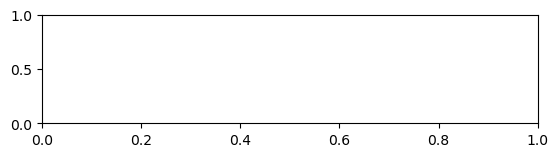

In [33]:
# Spread
plt.subplot(3, 1, 1)
plt.plot(depth20_1000ms['Time'], depth20_1000ms['Spread'], color='blue')
plt.ylabel('Spread')
plt.title('Bid-Ask Spread Over Time')
plt.grid(True)

# Rolling Volatility
plt.subplot(3, 1, 2)
plt.plot(depth20_1000ms['Time'], depth20_1000ms['RollingVolatility'], color='orange')
plt.ylabel('Volatility')
plt.title('Rolling Volatility of Mid Price')
plt.grid(True)

# OBI
plt.subplot(3, 1, 3)
plt.plot(depth20_1000ms['Time'], depth20_1000ms['OBI'], color='green')
plt.ylabel('OBI')
plt.title('Order Book Imbalance')
plt.grid(True)

plt.tight_layout()
plt.show()
import matplotlib.pyplot as plt

# Ensure 'Time' column is datetime and sorted
depth20 = depth20.sort_values('Time')
depth20['Time'] = pd.to_datetime(depth20['Time'], errors='coerce')

# Drop rows with NaT or NaNs in obi_full
depth20 = depth20.dropna(subset=['Time', 'obi_full'])

# Plot
plt.figure(figsize=(14, 6))
plt.plot(depth20['Time'], depth20['obi_full'], color='steelblue', label='OBI Full Depth (20 levels)')
plt.title('Order Book Imbalance (Full Depth - 20 Levels) Over Time')
plt.xlabel('Time')
plt.ylabel('OBI_Full')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# === Load aggTrade data ===
agg_trade = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/aggTrade.csv')

# === Clean and parse Time ===
def clean_time_column(col):
    col = col.astype(str)
    col = col.str.replace(r'\s\+0530\sIST', '', regex=True)
    col = col.str.slice(0, 26)
    return pd.to_datetime(col, errors='coerce')

agg_trade['Time'] = clean_time_column(agg_trade['Time'])
agg_trade = agg_trade.sort_values('Time').reset_index(drop=True)

# === 1. Rolling Volatility of Trade Price ===
agg_trade['PriceVolatility'] = agg_trade['Price'].rolling(window=50).std()

# === 2. Rolling Average Trade Size ===
agg_trade['AvgTradeSize'] = agg_trade['Quantity'].rolling(window=50).mean()

# === 3. Buy/Sell Imbalance Indicator ===
# Buy = ~IsMarketMaker, Sell = IsMarketMaker
agg_trade['BuySellImbalance'] = np.where(agg_trade['IsMarketMaker'] == True, -1, 1)

# Cumulative Buy/Sell Pressure
agg_trade['CumulativeImbalance'] = agg_trade['BuySellImbalance'].cumsum()

# Drop NaNs
agg_trade = agg_trade.dropna(subset=['PriceVolatility', 'AvgTradeSize'])

# === Plotting ===
plt.figure(figsize=(15, 12))

# Volatility
plt.subplot(3, 1, 1)
plt.plot(agg_trade['Time'], agg_trade['PriceVolatility'], color='purple')
plt.ylabel('Price Volatility')
plt.title('Rolling Trade Price Volatility')
plt.grid(True)

# Trade Size
plt.subplot(3, 1, 2)
plt.plot(agg_trade['Time'], agg_trade['AvgTradeSize'], color='teal')
plt.ylabel('Avg Trade Size')
plt.title('Rolling Avg Trade Size')
plt.grid(True)

# Buy/Sell Pressure
plt.subplot(3, 1, 3)
plt.plot(agg_trade['Time'], agg_trade['CumulativeImbalance'], color='darkred')
plt.ylabel('Cumulative Imbalance')
plt.title('Buy/Sell Imbalance Over Time')
plt.grid(True)

plt.tight_layout()
plt.show()



FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/aggTrade.csv'

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# --- Step 1: Load cleaned datasets ---
depth20 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/depth20_1000ms.csv')
agg_trade = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/aggTrade.csv')

# Clean time
def clean_time_column(col):
    col = col.astype(str).str.replace(r'\s\+0530\sIST', '', regex=True).str.slice(0, 26)
    return pd.to_datetime(col, errors='coerce')

depth20['Time'] = clean_time_column(depth20['Time'])
agg_trade['Time'] = clean_time_column(agg_trade['Time'])

# Sort
depth20 = depth20.sort_values('Time').reset_index(drop=True)
agg_trade = agg_trade.sort_values('Time').reset_index(drop=True)

# --- Step 2: Generate market features ---

# Best bid/ask price from full book
bid_price_cols = [f'BidPriceL{i}' for i in range(1, 21)]
ask_price_cols = [f'AskPriceL{i}' for i in range(1, 21)]
depth20['best_bid'] = depth20[bid_price_cols].max(axis=1)
depth20['best_ask'] = depth20[ask_price_cols].min(axis=1)

# Mid price and spread
depth20['mid_price'] = (depth20['best_bid'] + depth20['best_ask']) / 2
depth20['spread'] = depth20['best_ask'] - depth20['best_bid']

# Depth imbalance at top level
depth20['bid_qty'] = depth20['BidQtyL1']
depth20['ask_qty'] = depth20['AskQtyL1']
depth20['obi'] = (depth20['bid_qty'] - depth20['ask_qty']) / (depth20['bid_qty'] + depth20['ask_qty'])

# Volatility over rolling window
depth20['log_return'] = np.log(depth20['mid_price'] / depth20['mid_price'].shift(1))
depth20['volatility'] = depth20['log_return'].rolling(window=50).std()

# Drop NaNs
depth20 = depth20.dropna(subset=['volatility'])
# --- Step 3: Select & Normalize features for clustering ---
features = depth20[['spread', 'obi', 'volatility']]

# Drop any remaining NaNs (just in case)
features = features.dropna()

# Normalize
scaler = StandardScaler()
normalized_features = scaler.fit_transform(features)

# Convert back to DataFrame
normalized_df = pd.DataFrame(normalized_features, columns=features.columns)

# Optional: Save for clustering usage
normalized_df.to_csv('/content/drive/MyDrive/Colab Notebooks/normalized_features_week3.csv', index=False)

print(" Normalized features saved. Ready for clustering.")
